**Q1. Problem Statement: Support Vector Machine (SVM) Algorithm**

You are given a dataset – “breast_cancer.csv.” Load the dataset into a DataFrame. Now, Considering the “diagnosis” column as the target variable, perform the  following tasks:
1.	Declare feature vectors and the target variable and perform data analysis using correlation matrix and heatmap
2.	 Split the data into test and train fragments using train_test_split() function in 80:20 ratio (80% train, 20% test)
3.	Build a Linear SVM and calculate the accuracy of the model
4.	Build a Gaussian RBF SVM and calculate the accuracy of the model




**Step-1:** Loading the data into a DataFrame.

In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("Breast_cancer_data.csv")
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
85,18.46,18.52,121.10,1075.0,0.09874,0
272,21.75,20.99,147.30,1491.0,0.09401,0
405,10.94,18.59,70.39,370.0,0.10040,1
543,13.21,28.06,84.88,538.4,0.08671,1
383,12.39,17.48,80.64,462.9,0.10420,1


**Step-2:** Identifying null values if any.

In [4]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**Step-3:** Performing data analysis.

In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Text(0.5, 1.0, 'Data Correlation')

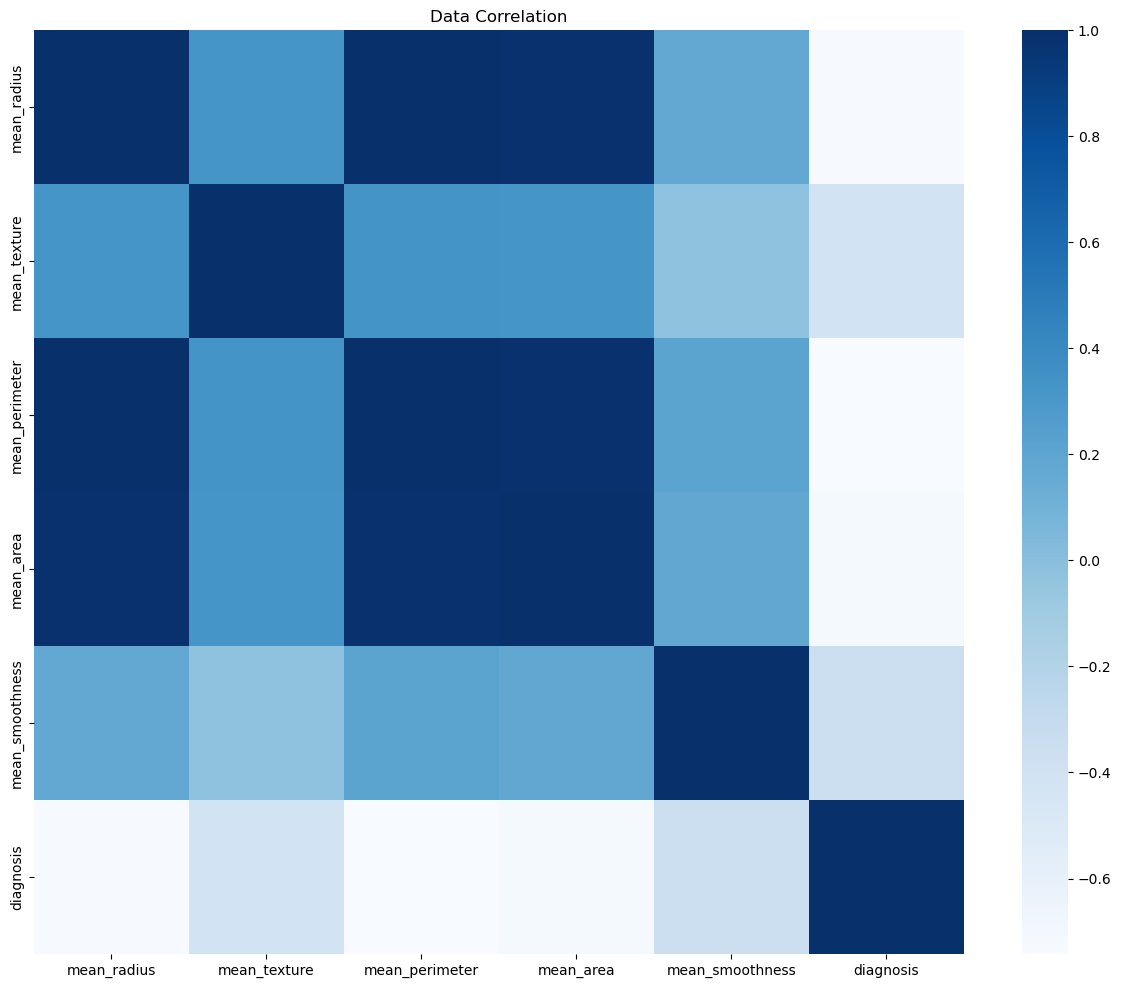

In [7]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues')
r.set_title("Data Correlation")

**Step-4:** Considering the "diagnosis" column as target variable, and rest of the columns as feature vectors, split the data into test and train parts 80:20 rartio.

In [8]:
y = df["diagnosis"].values
X=df.drop(["diagnosis"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=1)

In [9]:
import sys
print("After splitting the data-")
print("size of input train data is:", sys.getsizeof(X_train))
print("sizeof input test data is:", sys.getsizeof(X_test))
print("size of output train data is:", sys.getsizeof(y_train))
print("size of output test data is:", sys.getsizeof(y_test))

After splitting the data-
size of input train data is: 21872
sizeof input test data is: 5504
size of output train data is: 3752
size of output test data is: 1024


**Step-5:** Building a Linear Support Vector Machine (SVM) model.

**Some important hyperparameters that should be considered before training the model:**

1. C: Regularization parameter which a float value and is 1.0 by default. Must be strictly positive.

2. kernel: Specifies the kernel type to be used in the algorithm. ‘linear’, ‘poly’, ‘rbf’

3. degree: An optional integer value to specify the degree of polynomial kernel fucntion which is ignored by all other kernels

4. gamma: Kernel coefficient for 'rbf','poly'

5. coef0: Independent term in kernel function which is significant in 'poly'

In [10]:
svc_diagnosis=SVC(C=10,kernel='linear')

In [11]:
svc_diagnosis.fit(X_train,y_train)

SVC(C=10, kernel='linear')

**Step-6:** Calculating the linear SVM model acuracy.

In [17]:
pred=svc_diagnosis.predict(X_test)
acc_svc_diagnosis=accuracy_score(y_test,pred)
print('Accuracy Score of Linear Model: ',acc_svc_diagnosis)

Accuracy Score of Linear Model:  0.631578947368421


**Step-7:** Building a Gaussian RBF SVM model.

In [18]:
svc_diagnosis=SVC(C=10,kernel='rbf',gamma=2)

In [19]:
svc_diagnosis.fit(X_train,y_train)

SVC(C=10, gamma=2)

**Step-8:** Calculating the Gaussian RBF SVM model acuracy.

In [20]:
pred=svc_diagnosis.predict(X_test)
acc_svc_diagnosis=accuracy_score(y_test,pred)
print('Accuracy Score of Gaussian Model: ',acc_svc_diagnosis)

Accuracy Score of Gaussian Model:  0.631578947368421
